In [1]:
# Statistics Practical Part - 2

In [8]:
#1_ Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results

from statsmodels.stats.weightstats import ztest

data = [52, 50, 49, 51, 53, 54, 50]
z_stat, p_val = ztest(data, value=50)
print("Z-statistic:", z_stat)
print("P-value:", p_val)

Z-statistic: 1.8903781134378117
P-value: 0.05870740843120516


In [9]:
#2_ Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python

import numpy as np
from scipy.stats import ttest_1samp

data = np.random.normal(loc=5.5, scale=1.2, size=30)
t_stat, p_val = ttest_1samp(data, popmean=5.0)
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 2.10037597642563
P-value: 0.04450639274371851


In [10]:
#3_ Implement a one-sample Z-test using Python to compare the sample mean with the population mean

def one_sample_z_test(sample, population_mean, population_std):
    from scipy.stats import norm
    n = len(sample)
    sample_mean = np.mean(sample)
    z = (sample_mean - population_mean) / (population_std / np.sqrt(n))
    p = 2 * (1 - norm.cdf(abs(z)))
    return z, p

sample = np.random.normal(100, 15, 50)
z, p = one_sample_z_test(sample, 105, 15)
print("Z:", z, "P-value:", p)

Z: -2.6706790666057163 P-value: 0.007569798379075454


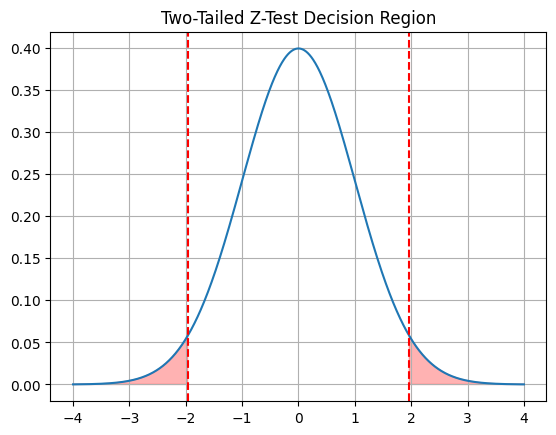

In [15]:
#4_Perform a two-tailed Z-test using Python and visualize the decision region on a plot

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # ✅ Required import

# Create standard normal distribution curve
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Plot the normal distribution
plt.plot(x, y)

# Compute and plot critical values
z_critical = norm.ppf(0.975)  # Two-tailed critical value for 95% confidence
plt.axvline(z_critical, color='r', linestyle='--')
plt.axvline(-z_critical, color='r', linestyle='--')

# Shade the rejection regions
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3)

# Add plot details
plt.title("Two-Tailed Z-Test Decision Region")
plt.grid()
plt.show()

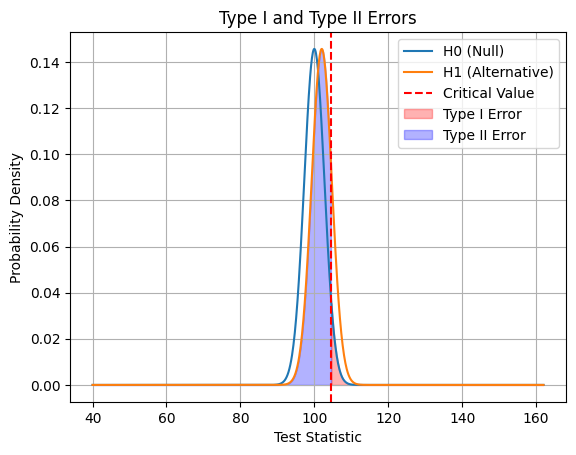

In [12]:
#5_Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  

def visualize_type_errors(mu0, mu1, sigma, alpha=0.05, n=30):
    x = np.linspace(mu0 - 4*sigma, mu1 + 4*sigma, 1000)
    se = sigma / np.sqrt(n)
    critical = norm.ppf(1 - alpha, mu0, se)

    plt.plot(x, norm.pdf(x, mu0, se), label="H0 (Null)")
    plt.plot(x, norm.pdf(x, mu1, se), label="H1 (Alternative)")
    plt.axvline(critical, color='red', linestyle='--', label="Critical Value")

    # Type I Error (reject H0 when H0 is true)
    plt.fill_between(x, 0, norm.pdf(x, mu0, se), where=(x > critical), color='red', alpha=0.3, label='Type I Error')

    # Type II Error (fail to reject H0 when H1 is true)
    plt.fill_between(x, 0, norm.pdf(x, mu1, se), where=(x <= critical), color='blue', alpha=0.3, label='Type II Error')

    plt.legend()
    plt.title("Type I and Type II Errors")
    plt.xlabel("Test Statistic")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()

visualize_type_errors(mu0=100, mu1=102, sigma=15)


In [13]:
#6_ Write a Python program to perform an independent T-test and interpret the results

from scipy.stats import ttest_ind

group1 = np.random.normal(60, 10, 30)
group2 = np.random.normal(65, 10, 30)
t_stat, p_val = ttest_ind(group1, group2)
print("T-statistic:", t_stat, "P-value:", p_val)

T-statistic: -1.130176768595616 P-value: 0.26305390480422175


Paired T-stat: -3.9062666588836548 P-value: 0.0009491271081714926


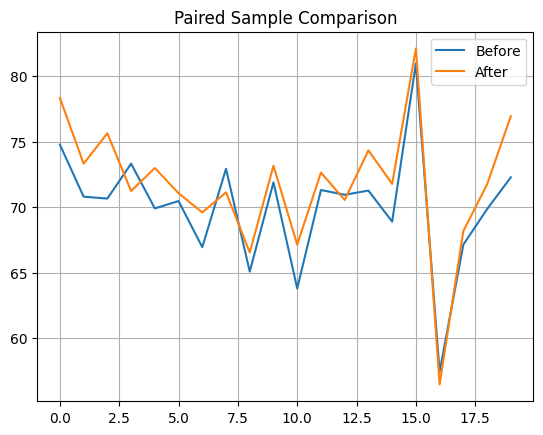

In [14]:
#7_ Perform a paired sample T-test using Python and visualize the comparison results

from scipy.stats import ttest_rel

before = np.random.normal(70, 5, 20)
after = before + np.random.normal(2, 2, 20)

t_stat, p_val = ttest_rel(before, after)
print("Paired T-stat:", t_stat, "P-value:", p_val)

plt.plot(before, label='Before')
plt.plot(after, label='After')
plt.legend()
plt.title("Paired Sample Comparison")
plt.grid()
plt.show()

In [7]:
#8_ Simulate data and perform both Z-test and T-test, then compare the results using Python

import numpy as np
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest  # ✅ Import for z-test

# Generate sample data
sample = np.random.normal(50, 12, 25)

# Perform z-test
z_stat, z_p = ztest(sample, value=52)

# Perform t-test
t_stat, t_p = ttest_1samp(sample, popmean=52)

# Output the results
print("Z-test: Z =", z_stat, ", P =", z_p)
print("T-test: T =", t_stat, ", P =", t_p)


Z-test: Z = -1.3406589620591156 , P = 0.18003120427457742
T-test: T = -1.3406589620591156 , P = 0.19258412923521606


In [6]:
#9_ Write a Python function to calculate the confidence interval for a sample mean and explain its significance

import numpy as np
from scipy import stats  # ✅ This line fixes the error

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)
    margin = stats.t.ppf((1 + confidence) / 2., len(data)-1) * se
    return mean - margin, mean + margin

# Generate sample data
data = np.random.normal(70, 8, 30)

# Compute and print confidence interval
ci = confidence_interval(data)
print("Confidence Interval:", ci)

Confidence Interval: (np.float64(65.64857520892362), np.float64(70.8439228748533))


In [5]:
#10_ Write a Python program to calculate the margin of error for a given confidence level using sample data

import numpy as np
from scipy import stats  # ✅ import added

def margin_of_error(data, confidence=0.95):
    se = stats.sem(data)  # standard error of the mean
    margin = stats.t.ppf((1 + confidence) / 2., len(data) - 1) * se
    return margin

# Generate sample data
sample = np.random.normal(80, 10, 50)

# Print result
print("Margin of Error:", margin_of_error(sample))


Margin of Error: 2.7924949142619853


In [17]:
#11_ Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process

def bayes_theorem(prior_a, likelihood_b_given_a, prior_not_a, likelihood_b_given_not_a):
    numerator = prior_a * likelihood_b_given_a
    denominator = numerator + prior_not_a * likelihood_b_given_not_a
    return numerator / denominator

# Example: Disease detection
p = bayes_theorem(0.01, 0.99, 0.99, 0.05)
print("Posterior Probability (P(A|B)):", p)

Posterior Probability (P(A|B)): 0.16666666666666669


In [3]:
#12_ Perform a Chi-square test for independence between two categorical variables in Python

import pandas as pd
from scipy.stats import chi2_contingency

data = [[30, 10], [20, 40]]
chi2, p, dof, expected = chi2_contingency(data)

print("Chi2 Stat:", chi2)
print("P-value:", p)
print("Expected Frequencies:\n", expected)

Chi2 Stat: 15.041666666666666
P-value: 0.00010516355403363098
Expected Frequencies:
 [[20. 20.]
 [30. 30.]]


In [19]:
#13_ Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data

obs = np.array([[30, 10], [20, 40]])
row_sums = obs.sum(axis=1)
col_sums = obs.sum(axis=0)
total = obs.sum()

expected = np.outer(row_sums, col_sums) / total
print("Expected Frequencies:\n", expected)

Expected Frequencies:
 [[20. 20.]
 [30. 30.]]


In [4]:
#14_ Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

from scipy.stats import chisquare

observed = [40, 35, 25]
expected = [33.33, 33.33, 33.34]  # Adjust to sum to 100

chi2, p = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Statistic:", chi2)
print("P-value:", p)


Chi-square Statistic: 3.504726597434791
P-value: 0.17336374861015957
